In [2]:
import numpy as np
from keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 6s 11us/step


In [11]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [12]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [45]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [46]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

Создание проверочного набора

In [47]:
x_val = x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [48]:
history=model.fit(partial_x_train, partial_y_train, batch_size=512, epochs=20, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.0957 - acc: 0.9783 - val_loss: 0.0851 - val_acc: 0.9782
Epoch 2/20
7982/7982 [==============================] - 1s 108us/step - loss: 0.0751 - acc: 0.9788 - val_loss: 0.0667 - val_acc: 0.9792
Epoch 3/20
7982/7982 [==============================] - 1s 109us/step - loss: 0.0562 - acc: 0.9823 - val_loss: 0.0517 - val_acc: 0.9847
Epoch 4/20
7982/7982 [==============================] - 1s 109us/step - loss: 0.0429 - acc: 0.9879 - val_loss: 0.0434 - val_acc: 0.9879
Epoch 5/20
7982/7982 [==============================] - 1s 107us/step - loss: 0.0349 - acc: 0.9909 - val_loss: 0.0384 - val_acc: 0.9902
Epoch 6/20
7982/7982 [==============================] - 1s 103us/step - loss: 0.0297 - acc: 0.9921 - val_loss: 0.0363 - val_acc: 0.9903
Epoch 7/20
7982/7982 [==============================] - 1s 112us/step - loss: 0.0258 - acc: 0.9929 - val_loss: 0.0345 - val_acc: 0.9907


In [49]:
import matplotlib.pyplot as plt

In [50]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [51]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]

epochs=range(1,len(loss) + 1)

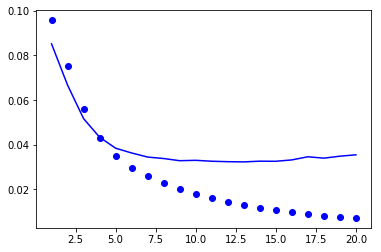

In [52]:
plt.plot(epochs, loss, "bo", label="Trainig loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")

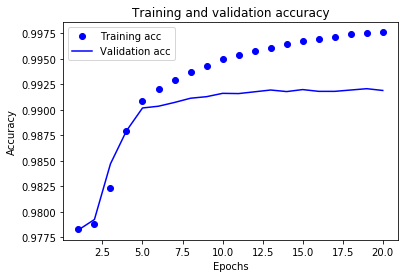

In [53]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [54]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])